In [1]:
#import and set data
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm
import stopword_pre
warnings.filterwarnings('ignore')


In [3]:
#==========get data=========================================
print("DATA LOADING........")
#cat_arti_mat = np.loadtxt("../../result/topic_idx.csv", delimiter=",", dtype = np.int8)
data_all = pd.read_csv("../../data/topic_data.csv")
keyword_list = pd.read_excel("../../data/Text_keyword_0620.xlsx")
keyword_list = list(keyword_list['Target 키워드'])

print("DONE")

DATA LOADING........
DONE


In [5]:
print("If you don't have NanumGothic in your computer, It will rasie error here")
import matplotlib.font_manager as fm
import matplotlib

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf").get_name()

matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

If you don't have NanumGothic in your computer, It will rasie error here


In [149]:
#Parameter

TARGET_CITY = ['포항시', '안성시']
MIN_SUPPORT = 0.005
MIN_THOLD = 0.1
TARGET_KEYWORD = ['빈집']

In [142]:
data_len_lst = []

#========filter by city and separate into three data set======================
dataset = data_all[data_all['city'].apply(lambda x: x in TARGET_CITY)]
dataset.reset_index(inplace=True, drop = True)
print(f"{TARGET_CITY} START")

keyword_set = dataset['특성추출(가중치순 상위 50개)']

#기사를 먼저 필터링 할 경우
                
key_temp = []
for item in keyword_set:
    item = str(item)
    item = stopword_pre.stopword(item)
    splited = item.split(",")
    temp = []
    for tok in splited:                         
        temp.append(tok.replace(" ", ""))
    key_temp.append(temp)



['포항시', '안성시'] START


a. 전체 기사를 데상으로 분석한 이후 타겟 키워드를 추출하려면 아래의 코드를 실행

In [143]:
key_set = key_temp

b. 타겟 키워드가 들어간 기사를 먼저 필터링해서 분석에 사용할 경우 아래의 코드 실행

In [64]:
# key_set = []
# for key in key_temp:
#     if len(set(key).intersection(set(TARGET_KEYWORD))):
#         key_set.append(key)

In [150]:
te = TransactionEncoder()
te_result = te.fit(key_set).transform(key_set)
key_df = pd.DataFrame(te_result, columns=te.columns_)


#==================apriori=====================================
#apriori

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
print("apriori start")
if len(key_set) <= 30:
    print("too small keyset")
    itemset = apriori(key_df, use_colnames=True)

else:
    itemset = apriori(key_df, min_support=MIN_SUPPORT, use_colnames=True)

from mlxtend.frequent_patterns import association_rules
print('association start')
apriori_result = association_rules(itemset, metric="confidence", min_threshold=MIN_THOLD)

apriori_result.head()

apriori start
association start


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1만),(안성시),0.019979,0.275710,0.005188,0.259649,0.941748,-0.000321,0.978307
1,(1만),(활성화),0.019979,0.181703,0.005959,0.298246,1.641386,0.002328,1.166073
2,(1명),(발생),0.014231,0.275780,0.009954,0.699507,2.536470,0.006030,2.410110
3,(1억),(피해),0.012408,0.200421,0.006449,0.519774,2.593416,0.003963,1.665006
4,(1천),(발생),0.030004,0.275780,0.005188,0.172897,0.626939,-0.003087,0.875611


같은 도시에서 TARGET KEYWORD만 바꿔서 결과를 보고 싶은 경우
상위 코드 다시 실행할 필요 없이 아래 코드만 다시 돌리면 됩니다

In [169]:
TARGET_KEYWORD = ['지역']

In [170]:
idx_lst = []
for idx, (a, b) in enumerate(zip(apriori_result['antecedents'], apriori_result['consequents'])):
    if len(a) == 1:
        if len(b) == 1:
            if list(a)[0] in TARGET_KEYWORD or list(b)[0] in TARGET_KEYWORD:
                idx_lst.append(idx)

print(f"# of single keyword set : {len(idx_lst)}")
apriori_single = apriori_result.iloc[idx_lst,:]
apriori_single.reset_index(drop = True, inplace = True)
apriori_single

# of single keyword set : 141


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1회),(지역),0.010726,0.203926,0.005678,0.529412,2.596101,0.003491,1.691658
1,(감지),(지역),0.009534,0.203926,0.006099,0.639706,3.136956,0.004155,2.209512
2,(개최),(지역),0.070452,0.203926,0.013039,0.185075,0.907559,-0.001328,0.976868
3,(건물),(지역),0.032317,0.203926,0.007781,0.240781,1.180729,0.001191,1.048544
4,(건설),(지역),0.044865,0.203926,0.009043,0.201563,0.988412,-0.000106,0.997040
...,...,...,...,...,...,...,...,...,...
136,(환경),(지역),0.021311,0.203926,0.005959,0.279605,1.371113,0.001613,1.105053
137,(활동),(지역),0.027971,0.203926,0.010866,0.388471,1.904964,0.005162,1.301777
138,(활성),(지역),0.014020,0.203926,0.006870,0.490000,2.402836,0.004011,1.560930
139,(회장),(지역),0.021451,0.203926,0.006449,0.300654,1.474329,0.002075,1.138312


In [171]:
#===============Draw Network=======================================
network_data = apriori_single[['antecedents', 'consequents', 'lift']]
#print(f"netword_data : {network_data.shape}")

import matplotlib.pyplot as plt
import networkx as nx

# lift 값의 기준도 바꿔도 됩니다.
thold = 1

#===============Build graph===================================
network_data = network_data[network_data['lift'] > thold]
graph = nx.DiGraph()
for i in tqdm(range(len(network_data))):
    a, b, c = network_data.iloc[i, :]
    a = list(a)
    b = list(b)
    a = a[0].replace(" ", "")
    b = b[0].replace(" ", "")
    graph.add_edge(a, b, weight = round(c,3))

print(f"Number of node : {graph.number_of_nodes()}")

key_match_lst = []
i = 0
for node in graph.nodes:
    if node in keyword_list:
        key_match_lst.append(node)
print("Draw Net")


100%|██████████| 117/117 [00:00<00:00, 4397.96it/s]

Number of node : 107
Draw Net


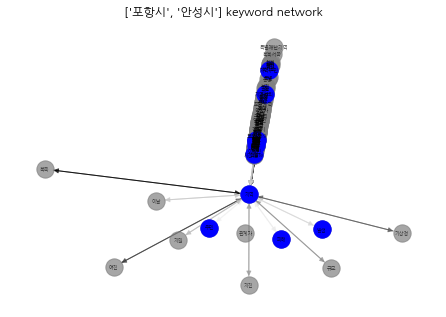

<Figure size 432x288 with 0 Axes>

In [172]:
#===========Check edges and weights=====================
try:
    edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())
except:
    print(f"It is empty graph")
else:
    n_size = dict(graph.degree)
    pos = nx.kamada_kawai_layout(graph)
    nx.draw(graph, nodelist=n_size.keys(), 
            #node_size=[n_size.values()],
            with_labels = True, 
            font_family = font_name, 
            font_size = 5,
            alpha = 0.7,
            pos = pos,
            node_color = 'grey',
            edgelist=edges, edge_color=weights, width=1, edge_cmap=plt.cm.binary)

    nx.draw_networkx_nodes(
        graph.subgraph(key_match_lst),
        pos = pos,
        node_color = 'blue'
    )

    plt.title(f"{TARGET_CITY} keyword network")
    plt.show()
    plt.clf()
